## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   6.712776   639.490836  0.396619  3.079309  1.596246
1  88.617053   930.653017  0.999552  2.538607  1.553882
2  91.087955   539.782886  0.563099  8.422115  1.247355
3  99.332357  1561.039011  0.773069  6.643864  1.403852
4  42.658767   939.523568  0.941613  6.608524  1.513521


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0580975	total: 68.6ms	remaining: 1m 8s
1:	learn: 1.0491487	total: 69.1ms	remaining: 34.5s
2:	learn: 1.0396455	total: 69.7ms	remaining: 23.2s
3:	learn: 1.0292381	total: 70.1ms	remaining: 17.5s
4:	learn: 1.0201562	total: 70.6ms	remaining: 14.1s
5:	learn: 1.0109110	total: 71.3ms	remaining: 11.8s
6:	learn: 1.0021726	total: 71.5ms	remaining: 10.1s
7:	learn: 0.9913616	total: 71.9ms	remaining: 8.92s
8:	learn: 0.9828445	total: 72.3ms	remaining: 7.96s
9:	learn: 0.9745078	total: 72.7ms	remaining: 7.2s
10:	learn: 0.9652495	total: 73.2ms	remaining: 6.58s
11:	learn: 0.9556201	total: 73.6ms	remaining: 6.06s
12:	learn: 0.9471156	total: 74ms	remaining: 5.62s
13:	learn: 0.9370629	total: 74.2ms	remaining: 5.23s
14:	learn: 0.9292852	total: 74.7ms	remaining: 4.9s
15:	learn: 0.9219299	total: 75.2ms	remaining: 4.62s
16:	learn: 0.9150399	total: 75.7ms	remaining: 4.37s
17:	learn: 0.9074776	total: 75.9ms	remaining: 4.14s
18:	learn: 0.8988888	total: 76.3ms	remaining: 3.

95:	learn: 0.5002530	total: 108ms	remaining: 1.02s
96:	learn: 0.4962400	total: 109ms	remaining: 1.01s
97:	learn: 0.4925342	total: 109ms	remaining: 1.01s
98:	learn: 0.4891904	total: 110ms	remaining: 998ms
99:	learn: 0.4854094	total: 110ms	remaining: 992ms
100:	learn: 0.4819173	total: 111ms	remaining: 984ms
101:	learn: 0.4787716	total: 111ms	remaining: 977ms
102:	learn: 0.4754449	total: 111ms	remaining: 970ms
103:	learn: 0.4730975	total: 112ms	remaining: 963ms
104:	learn: 0.4699461	total: 112ms	remaining: 957ms
105:	learn: 0.4668656	total: 113ms	remaining: 950ms
106:	learn: 0.4634327	total: 113ms	remaining: 943ms
107:	learn: 0.4599861	total: 113ms	remaining: 937ms
108:	learn: 0.4575423	total: 114ms	remaining: 930ms
109:	learn: 0.4549877	total: 114ms	remaining: 925ms
110:	learn: 0.4512150	total: 115ms	remaining: 918ms
111:	learn: 0.4487960	total: 115ms	remaining: 911ms
112:	learn: 0.4459000	total: 115ms	remaining: 905ms
113:	learn: 0.4430595	total: 116ms	remaining: 899ms
114:	learn: 0.440

272:	learn: 0.2151014	total: 187ms	remaining: 498ms
273:	learn: 0.2142559	total: 187ms	remaining: 496ms
274:	learn: 0.2138724	total: 188ms	remaining: 495ms
275:	learn: 0.2129732	total: 188ms	remaining: 493ms
276:	learn: 0.2121205	total: 188ms	remaining: 492ms
277:	learn: 0.2116694	total: 189ms	remaining: 490ms
278:	learn: 0.2112995	total: 189ms	remaining: 489ms
279:	learn: 0.2105380	total: 190ms	remaining: 487ms
280:	learn: 0.2101537	total: 190ms	remaining: 486ms
281:	learn: 0.2094517	total: 190ms	remaining: 484ms
282:	learn: 0.2091629	total: 191ms	remaining: 483ms
283:	learn: 0.2086836	total: 191ms	remaining: 482ms
284:	learn: 0.2079800	total: 192ms	remaining: 480ms
285:	learn: 0.2076052	total: 192ms	remaining: 479ms
286:	learn: 0.2072095	total: 192ms	remaining: 478ms
287:	learn: 0.2068840	total: 193ms	remaining: 477ms
288:	learn: 0.2063409	total: 193ms	remaining: 475ms
289:	learn: 0.2053812	total: 193ms	remaining: 474ms
290:	learn: 0.2049475	total: 194ms	remaining: 472ms
291:	learn: 

513:	learn: 0.1081193	total: 290ms	remaining: 274ms
514:	learn: 0.1079464	total: 290ms	remaining: 273ms
515:	learn: 0.1074175	total: 291ms	remaining: 273ms
516:	learn: 0.1070985	total: 291ms	remaining: 272ms
517:	learn: 0.1064843	total: 292ms	remaining: 271ms
518:	learn: 0.1060583	total: 292ms	remaining: 271ms
519:	learn: 0.1056474	total: 292ms	remaining: 270ms
520:	learn: 0.1052453	total: 293ms	remaining: 269ms
521:	learn: 0.1048252	total: 293ms	remaining: 268ms
522:	learn: 0.1044315	total: 293ms	remaining: 268ms
523:	learn: 0.1040599	total: 294ms	remaining: 267ms
524:	learn: 0.1036497	total: 294ms	remaining: 266ms
525:	learn: 0.1034871	total: 295ms	remaining: 266ms
526:	learn: 0.1031212	total: 295ms	remaining: 265ms
527:	learn: 0.1027917	total: 295ms	remaining: 264ms
528:	learn: 0.1024476	total: 296ms	remaining: 263ms
529:	learn: 0.1022904	total: 296ms	remaining: 263ms
530:	learn: 0.1019347	total: 297ms	remaining: 262ms
531:	learn: 0.1016148	total: 298ms	remaining: 262ms
532:	learn: 

698:	learn: 0.0666295	total: 369ms	remaining: 159ms
699:	learn: 0.0664458	total: 369ms	remaining: 158ms
700:	learn: 0.0662489	total: 369ms	remaining: 158ms
701:	learn: 0.0660973	total: 370ms	remaining: 157ms
702:	learn: 0.0659663	total: 370ms	remaining: 157ms
703:	learn: 0.0657452	total: 371ms	remaining: 156ms
704:	learn: 0.0655488	total: 371ms	remaining: 155ms
705:	learn: 0.0654013	total: 372ms	remaining: 155ms
706:	learn: 0.0652686	total: 372ms	remaining: 154ms
707:	learn: 0.0651425	total: 373ms	remaining: 154ms
708:	learn: 0.0649820	total: 374ms	remaining: 153ms
709:	learn: 0.0647942	total: 374ms	remaining: 153ms
710:	learn: 0.0646396	total: 374ms	remaining: 152ms
711:	learn: 0.0645790	total: 375ms	remaining: 152ms
712:	learn: 0.0644523	total: 375ms	remaining: 151ms
713:	learn: 0.0642491	total: 376ms	remaining: 151ms
714:	learn: 0.0641269	total: 376ms	remaining: 150ms
715:	learn: 0.0640678	total: 377ms	remaining: 149ms
716:	learn: 0.0639958	total: 377ms	remaining: 149ms
717:	learn: 

935:	learn: 0.0325779	total: 471ms	remaining: 32.2ms
936:	learn: 0.0324779	total: 472ms	remaining: 31.7ms
937:	learn: 0.0324449	total: 472ms	remaining: 31.2ms
938:	learn: 0.0323927	total: 473ms	remaining: 30.7ms
939:	learn: 0.0322739	total: 473ms	remaining: 30.2ms
940:	learn: 0.0322413	total: 473ms	remaining: 29.7ms
941:	learn: 0.0321673	total: 474ms	remaining: 29.2ms
942:	learn: 0.0321156	total: 474ms	remaining: 28.7ms
943:	learn: 0.0320429	total: 475ms	remaining: 28.2ms
944:	learn: 0.0319068	total: 475ms	remaining: 27.7ms
945:	learn: 0.0317594	total: 476ms	remaining: 27.1ms
946:	learn: 0.0316282	total: 476ms	remaining: 26.6ms
947:	learn: 0.0315336	total: 476ms	remaining: 26.1ms
948:	learn: 0.0315018	total: 477ms	remaining: 25.6ms
949:	learn: 0.0313889	total: 477ms	remaining: 25.1ms
950:	learn: 0.0313574	total: 478ms	remaining: 24.6ms
951:	learn: 0.0312657	total: 478ms	remaining: 24.1ms
952:	learn: 0.0312346	total: 478ms	remaining: 23.6ms
953:	learn: 0.0311843	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

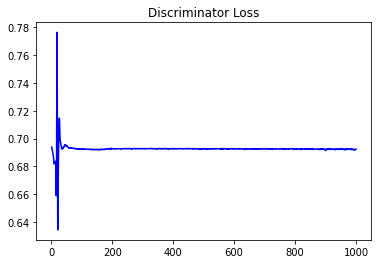

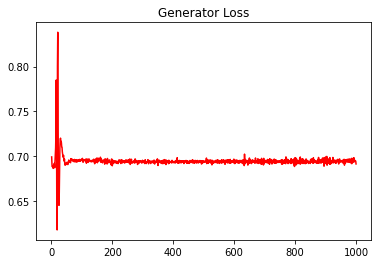

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08155996690728266


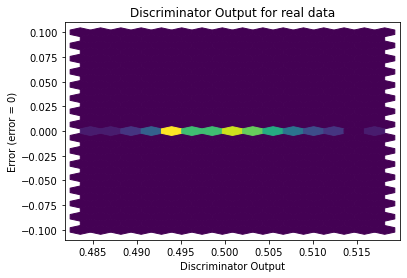

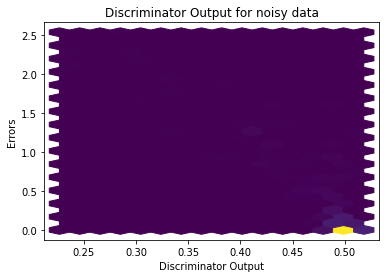

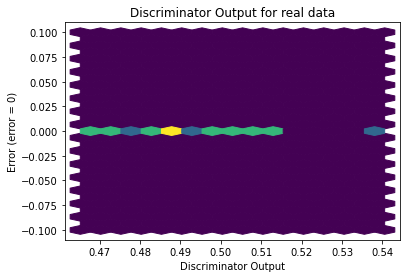

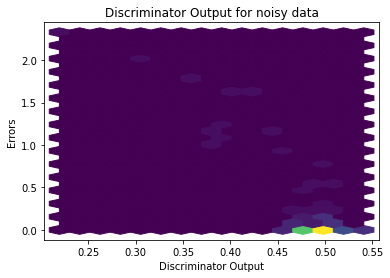

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


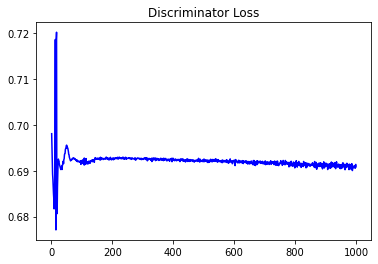

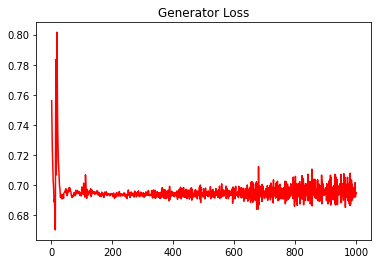

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.06782081921575163


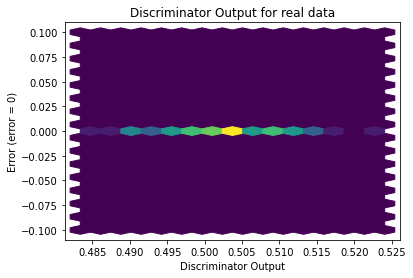

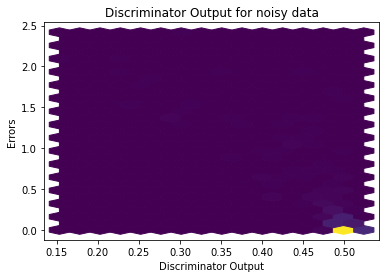

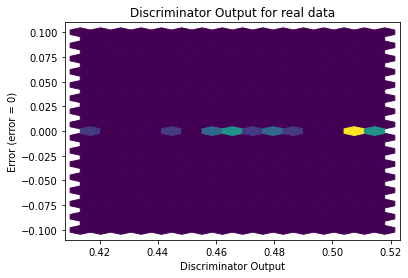

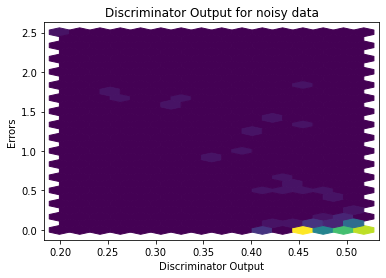

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7281]], requires_grad=True)
